# Problem Set #1 - Stevenson

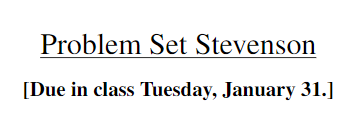

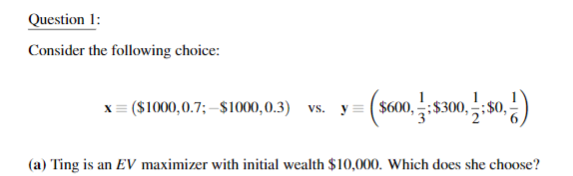

Ting will choose the highest expected value, which is multiplying outcome cash value by probability. His initial wealth is irrelevant.

$$EV(x) = 1000*0.7 - 1000*0.3 = 700-300=400$$
$$EV(y) = 600*\frac{1}{3} + 300*\frac{1}{2} + 0 = 200+150 = 350$$
Ting will choose X since her expected value is higher in that case



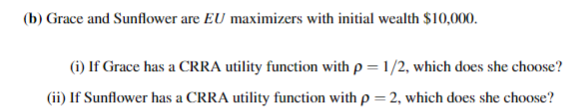

The CRRA utility function is given by:

$ EU(W) = \begin{cases} \frac{W^{1-\rho}}{1-\rho} & \text{if } \rho \neq 1 \\ \ln(W) & \text{if } \rho = 1 \end{cases} $

Thus Grace's CRRA function is 
$ EU(W) = \frac{W^{1-1/2}}{1-1/2} = 2W^{1/2} $ <br>

and Sunflower's is 
$ U(W) = \frac{W^{1-2}}{1-2} = -W^{-1} $

The possible outcomes of x and y are

$
x:\\
70\% \space \$10000+\$1000 = \$11000\\
30\% \space \$10000-\$1000 = \$9000
$

$
y:\\
33\% \space \$10000+\$600=\$10600 \\
50\% \space \$10000+\$300=\$10300 \\
16\% \space \$10000
$

Using Grace's CRRA function, her EU for x and y are

$
EU(x) = .7 * 2(11000)^{\frac{1}{2}} + .3 * 2(9000)^{\frac{1}{2}} =  203.75\\
EU(y) = \frac{1}{3} * 2(10600)^{\frac{1}{2}} + \frac{1}{2} *2(10300)^{\frac{1}{2}} + \frac{1}{6}* 2(10000)^{\frac{1}{2}} = 203.46
$

As such Grace will choose x

Sunflower chooses the opposite, as shown by

$
EU(x) = .7 * -(11000)^{-1} + .3 * -(9000)^{-1} = -9.697e-5 \\
EU(y) = \frac{1}{3} (-(10600)^{-1}) + \frac{1}{2} (-(10300)^{-1}) + \frac{1}{6} (-(10000)^{-1})=-9.666e-5
$

Since EU(y) is less small, Sunflower prefers EU(y)

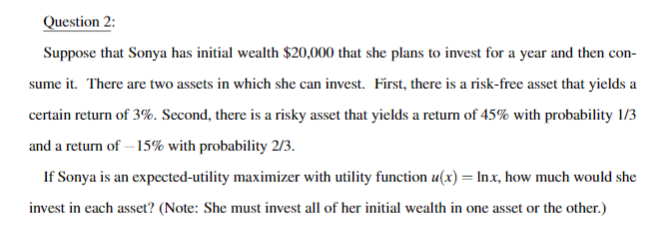

In [4]:
import numpy as np
w1 = 20000*1.03

w2 = [20000*1.45, 20000*(1-.15)]
p2 = [1/3,2/3]

def u(w,p):
    return( p * np.log(w))

eu1 = u(w1,1)
eu2 = u(w2[0],p2[0]) + u(w2[1],p2[1])

print(eu1, eu2)
1-.15

9.933046354777673 9.918996118348439


0.85

I believe a bit of calculus is required for this one. We will find when the derivative of total expected utility equals zero. Lets call option 1 x and option 2 y.

$w_1 + w_2 = 20000$

$EU_x(w_1) = ln(w_1*1.03) \\
EU_y(w_2) = \frac{1}{3} ln(w_2*1.45) + \frac{2}{3} ln(w_2*.85) \\
EU = ln(w_1*1.03) + \frac{1}{3} ln(w_2*1.45) + \frac{2}{3} ln(w_2*.85) $

I don't see any reason to simplify these logarithms, this isn't a math class after all.


In [5]:
from sympy import symbols, Eq, solve, ln

w1, w2, lambda_ = symbols('w1 w2 lambda')

EU = ln(w1 * 1.03) + (1/3) * ln(w2 * 1.45) + (2/3) * ln(w2 * 0.85)
Eq(w1 + w2, 20000)

L = EU - lambda_ * (w1 + w2 - 20000)

dw1 = L.diff(w1)
dw2 = L.diff(w2)
dlambda = L.diff(lambda_)

solution = solve((dw1, dw2, dlambda), (w1, w2, lambda_))

solution


[(10000.0000000000, 10000.0000000000, 0.000100000000000000)]

Okay maybe it would have been easier to simplify the logarithms. The best way for sonya to optimize her utility would be to invest equally into each asset

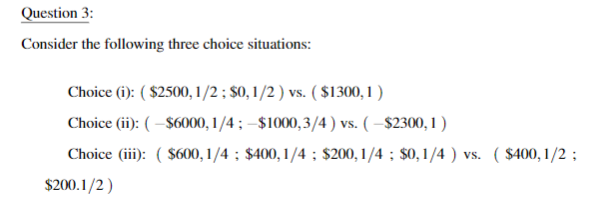

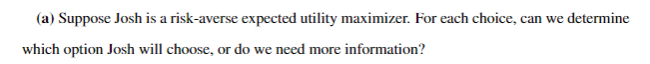

Risk averse: Josh prefers EV(x) to x, which would be reflected in his utility function if we had one for him. Unfortunately we do not, so we need more information to know his preferred choice. 

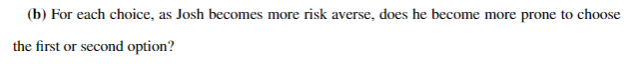

In each situation a risk-averse josh prefers the second option over the first, since they all reduce the chances of a worst possible outcome which risk-aversion tends to place more weight on.

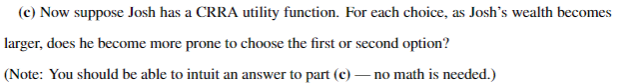

Josh's increasing wealth causes him to become less worried about losses and as a result he begins to value the first option over the second for each example.

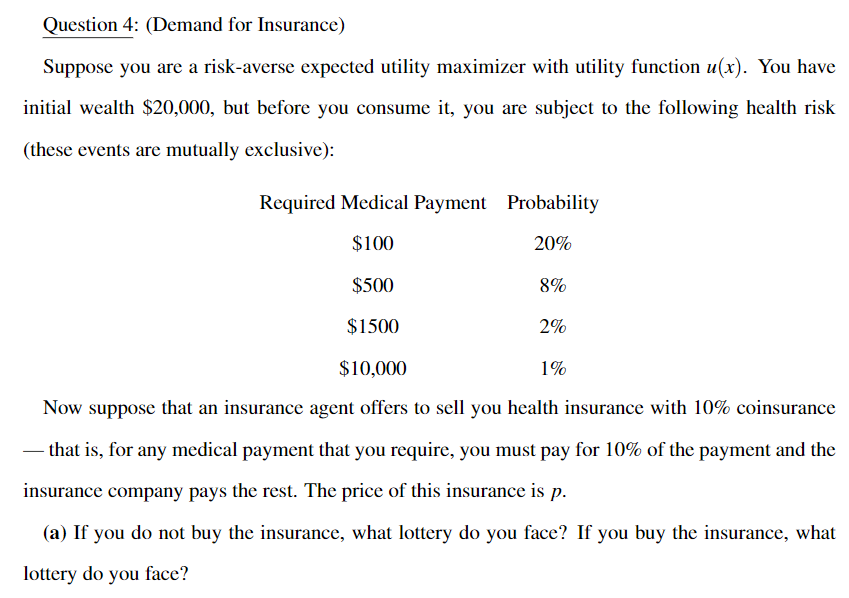

Uninsured: $$[W_i,0.69; W_i-100,0.2;W_i-500,0.08;W_i-1500,0.02;W_i-10000,0.01]$$ where $W_i = 20,000 $

Insured: $$[W_i-p,0.69; W_i-(p+10),0.2;W_i-(p+50),0.08;W_i-(p+150),0.02;W_i-(p+1000),0.01]$$ where $W_i = 20,000 $

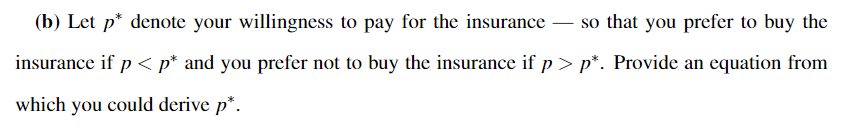

$p^*$ depends on my utility function, which I'll call $EU(x)$. I prefer to buy insurance when EU(uninsured)<EU(insured)

$$EU(\text{uninsured}) = 0.69 EU(20,000) + 0.2EU(19,900) + 0.08EU(19,500) + 0.02EU(18,500)+0.01EU(10,000)$$
$$EU(\text{insured}) = 0.69 EU(20,000-p) + 0.2EU(19,990-p) + 0.08EU(19,950-p) + 0.02EU(19,850-p)+0.01EU(19,000-p)$$

$P^*$ is the value at which the expected utility of each lottery is equal. I am currently reviewing my homework before I turn it in, and I just saw the words __from which__, which means all the math after this isn't necessary.

Since the equation for $p^*$ depends on the definition of $EU$, which is undefined, I will assume $EU(x)=x$ and check when $EU(\text{uninsured})=EU(\text{insured})$

$$0.69(20,000) + 0.2(19,900) + 0.08(19,500) + 0.02(18,500)+0.01(10,000) = 0.69(20,000-p) + 0.2(19,990-p) + 0.08(19,950-p) + 0.02(19,850-p)+0.01(19,000-p)$$

In [11]:
p = symbols('p')
uninsured = 0.69 * 20000 + 0.2 * 19900 + 0.08 * 19500 + 0.02 * 18500 + 0.01 * 10000
insured = 0.69 * (20000 - p) + 0.2 * (19990 - p) + 0.08 * (19950 - p) + 0.02 * (19850 - p) + 0.01 * (19000 - p)
pstar = solve(insured - uninsured, p)
pstar


[171.000000000000]

In this case, $p^*$ = 171

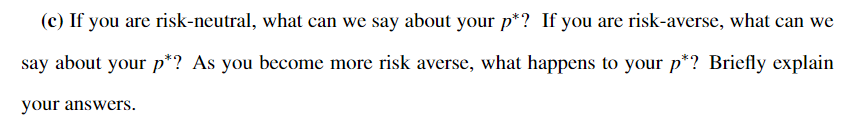

If you are risk-neutral, we know for certain that $p^* =171$, as $EU(x)=x$ represents the risk-neutral utility function. If you are risk averse, $p^*$ decreases as the gain of wealth is weighted less than the loss of wealth by the expected utility function for a risk-averse individual.

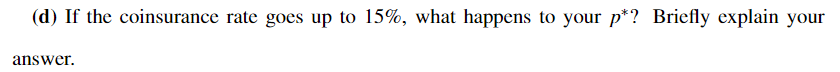

The insurance will become less valuble since the value of the outcomes are lower. $p^*$ decreases.

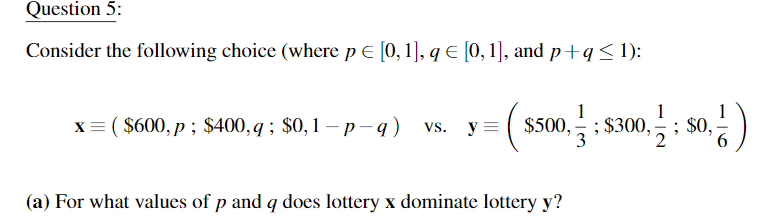

One lottery dominates another if for every cash value you have an equal to or higher probability of earning that cash value with the dominating lottery over the dominated lottery.

$x$ and $y$ earn the same up to $\$299$, but $q$ must equal a value equal to or greater than $\frac{1}{2}$ to surpass $y$'s \$300 bin and $p$ must be equal to or greater than $\frac{1}{3}$

Thus $\frac{1}{3} \leq p \leq \frac{1}{2}$ and $\frac{1}{2} \leq q \leq \frac{2}{3} $ 

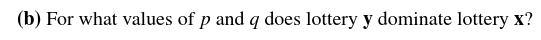

Since the cash value for the $\$600$ bin is greater than all buckets for $y$, it must have zero probability $p=0$

The second bucket for $x$ has a smaller value than $y$'s $\$500$ bucket, so it can be superceded by its $\frac{1}{3}$ probability, so $q \leq \frac{1}{3}$

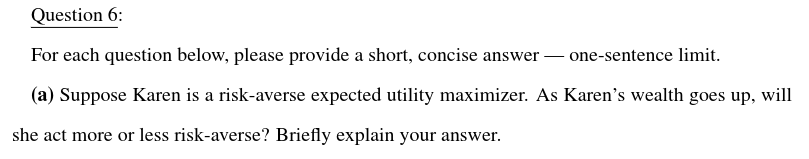

Karen will become less risk-averse as the slope of her utility function becomes flatter and a wealth decrease represents a less dramatic drop in expected utility

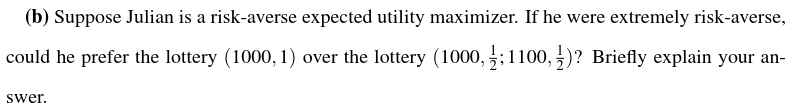

Julian wil prefer the second lottery as it is dominant and provides as much if not more utility no matter what

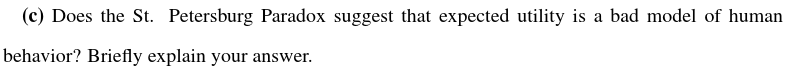

Expected utility answers St. Petersburg's Paradox by reducing the utility of extremely high wealth outcomes and increasing the seriousness of a drop in wealth, allowing for a sub-infinite value for the St. Petersburg's Paradox lottery